# Import  libraries

In [2]:
import numpy as np #For linear Algebra
import pandas as pd #for data processing
import matplotlib.pyplot as plt #MATLAB-like way of plotting
import seaborn as sns #for drawing attractive and informative statistical graphics
import glob #for searching schemas
import cv2 #for common infrastructure for computer vision applications
import os 
import warnings
# filter warnings
warnings.filterwarnings('ignore')

#  Import Training data data  and convert it from image form to array form using  os and cv2 libraries

In [3]:
np.random.seed(1234) 
direct="flowers/Training/" 
#!ls "flowers/Training/" # just to test link
tabClass = ["daisy" , "dandelion", "rose","sunflower","tulip" ]
arrays = []
img_size= 150
for i in tabClass:
    path=os.path.join(direct,i)
    num_class=tabClass.index(i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),
                             cv2.IMREAD_GRAYSCALE)
        img_array=cv2.resize(img_array,(img_size,img_size))
        arrays.append([img_array,num_class])
#print(len(arrays)) #to check if images were added

# Import testing data  and convert it from image form to array form using  os and cv2 libraries

In [9]:
direc2="flowers/Testing/"
tabClass_test = ["daisy" , "dandelion", "rose","sunflower","tulip" ]
arrays_test=[]
img_size=150
for i in tabClass_test:
    path=os.path.join(direc2,i)
    class_num=tabClass_test.index(i)
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img),
                             cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.resize(img_array2,(img_size,img_size))
        arrays_test.append([img_array2,class_num])
print(len(arrays_test))

591


# Examples

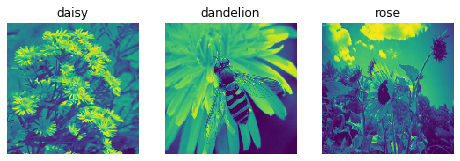

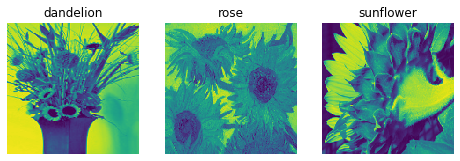

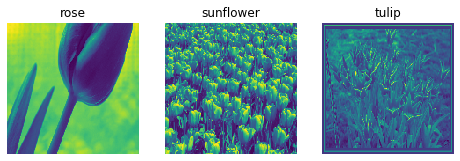

In [13]:
flowers_train=[]
for features,label in arrays_test:
    flowers_train.append(features)

location=[[1,200,350],[400,430,440],[460,480,590]]
flower_names=["daisy","dandelion","rose","sunflower","tulip"]
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(flowers_train[i])
    plt.title(flower_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(flowers_train[j])
    plt.title(flower_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(flowers_train[k])
    plt.title(flower_names[c])
    plt.axis("off")
    a+=1
    b+=1
    c+=1

# create the X features and Y labels. and use shuffle function to mix dataset.

In [14]:
import random
random.shuffle(arrays)

X_train=[]
Y_train=[]
for features,label in arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) 

import random
random.shuffle(arrays_test)

X_test=[]
Y_test=[]
for features,label in arrays_test:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) 

# Normalization

In [15]:
X_train=X_train.reshape(-1,img_size,img_size,1)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,1)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (3732, 150, 150, 1)
shape of X_test=   (591, 150, 150, 1)


# convert our labels to one-hot-encoding values

In [16]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

Using TensorFlow backend.


In [17]:
from sklearn.model_selection import  train_test_split #to separat our datas to train and validation datas.
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [29]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D #Dropout to avoid overfitting 
#With Dense we added hidden layers and With relu function we don't have variance around zer
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=40
batch_size=36

In [21]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/40
82/82 [==============================] - 36s 441ms/step - loss: 0.2847 - accuracy: 0.8883 - val_loss: 0.2734 - val_accuracy: 0.8889
Epoch 2/40
82/82 [==============================] - 33s 404ms/step - loss: 0.2727 - accuracy: 0.8885 - val_loss: 0.2670 - val_accuracy: 0.8889
Epoch 3/40
82/82 [==============================] - 33s 405ms/step - loss: 0.2700 - accuracy: 0.8884 - val_loss: 0.2655 - val_accuracy: 0.8889
Epoch 4/40
82/82 [==============================] - 32s 395ms/step - loss: 0.2680 - accuracy: 0.8887 - val_loss: 0.2661 - val_accuracy: 0.8889
Epoch 5/40
82/82 [==============================] - 33s 406ms/step - loss: 0.2701 - accuracy: 0.8887 - val_loss: 0.2660 - val_accuracy: 0.8884
Epoch 6/40
82/82 [==============================] - 34s 415ms/step - loss: 0.2657 - accuracy: 0.8892 - val_loss: 0.2577 - val_accuracy: 0.8905
Epoch 7/40
82/82 [==============================] - 34s 413ms/step - loss: 0.2630 - accuracy: 0.8896 - val_loss: 0.2550 - val_accuracy: 0.8896

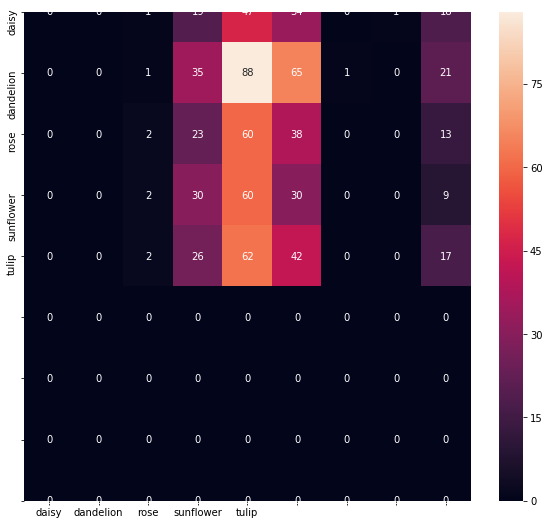

In [23]:
#confusion matrix
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
flower_names=["daisy","dandelion","rose","sunflower","tulip"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(flower_names)
ax.set_yticklabels(flower_names)
plt.show()


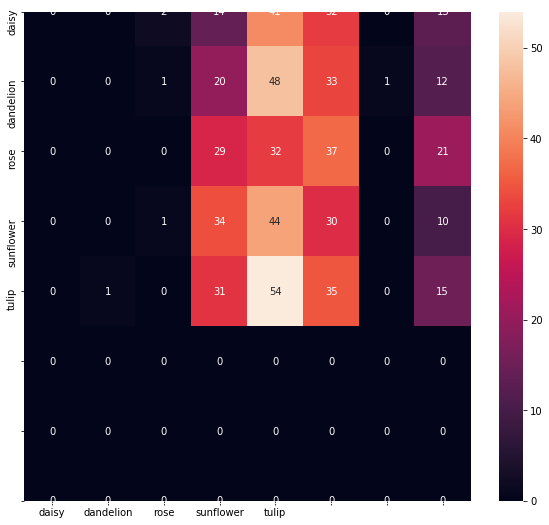

In [25]:
#confusion matrix
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(flower_names)
ax.set_yticklabels(flower_names)
plt.show()

# Visualize Loss Function

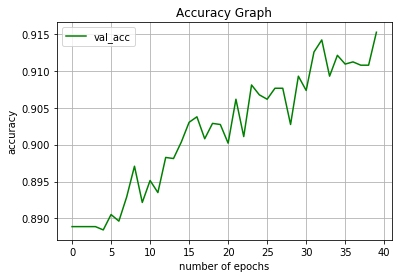

In [28]:
plt.plot(history.history["val_accuracy"],color="g",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()